In [19]:
%load_ext autoreload
%autoreload 2
from src.catalogs import (
    JapanSlowSlipCatalog,
)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import src
from pathlib import Path
base_dir = Path(src.__file__).parents[1]

mpl.rc('figure',dpi=200)
plt.style.use('tableau-colorblind10')
mpl.rc('font',size=8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%matplotlib widget

In [21]:
nankai = JapanSlowSlipCatalog().get_nankai_trough()
refs = nankai.catalog.ref.unique()

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from r

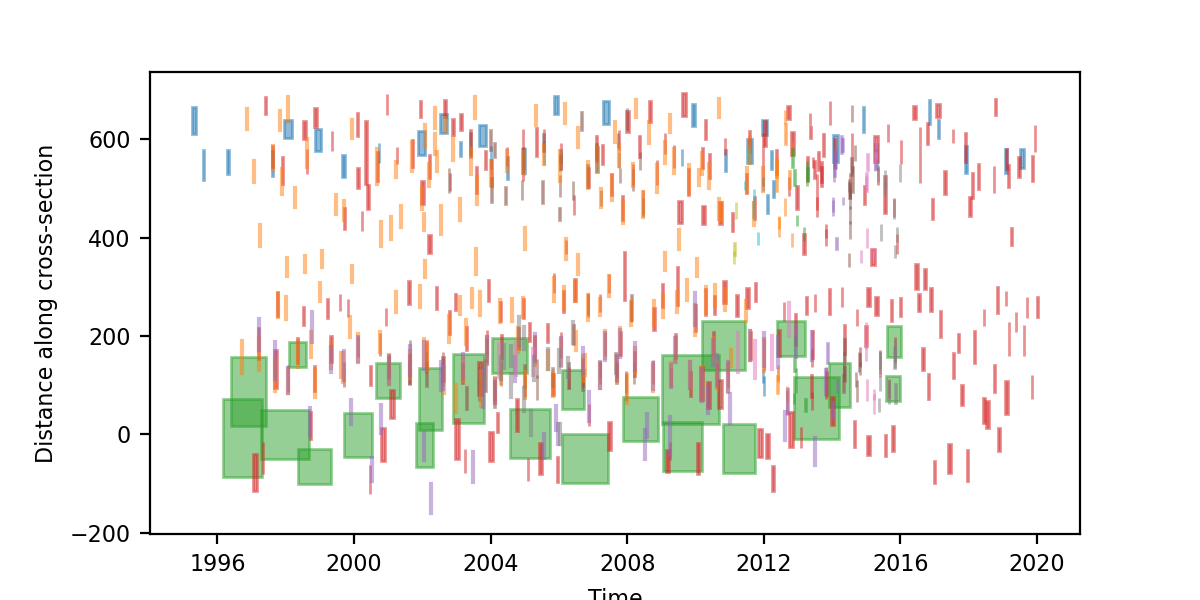

In [22]:
colors = sns.color_palette("deep", len(refs))
fig, ax = plt.subplots(1,1,figsize=(6,3))
colors = sns.color_palette("tab10", len(refs))
for ref, i_color in zip(refs, colors):
    JapanSlowSlipCatalog().get_nankai_trough(ref).plot_space_time_series(p1=[132,32.5],p2=[138,35], ax=ax, kwargs=dict(color=i_color))
    

In [23]:
unique_nankai = nankai.filter_duplicates(
    buffer_radius_km = 70,
    buffer_time_days = 40,
    stategy='reference',
    ref_preference = nankai.catalog.groupby('ref').max().time.sort_values(ascending=False).index
)

In [24]:
print(f'Number of events: {len(nankai)}')
print(f'Number of unique events: {len(unique_nankai)}')

Number of events: 732
Number of unique events: 372


In [29]:
%matplotlib inline
indices = nankai.intersection(
    nankai,
    buffer_radius_km=70,
    buffer_time_days=40,
    return_indices=True,    
)[1]

sigma_t = []
sigma_M = []
sigma_duration = []
num_ref = []
segments = []
for i in indices:
    if len(i)>1:
        unique_refs = nankai.catalog.iloc[i].ref.unique()
        num_ref.append(len(nankai.catalog.iloc[i].ref.unique()))
        
        _segments = []
        _mags = []
        _times = [] 
        for iref in unique_refs:
            _segments.append((nankai.catalog.iloc[i].ref == iref).sum())
            mags = nankai.catalog.iloc[i].mag[nankai.catalog.iloc[i].ref == iref]
            t = nankai.catalog.iloc[i].time[nankai.catalog.iloc[i].ref == iref]
            
            if len(mags)>1:
                moments = 10**(1.5*mags-9.1)
                _mags.append(2/3*(np.log10(moments.sum())+9.1))
            else:
                _mags.append(mags.values[0])
                
        sigma_segments.append(_segments)
        sigma_M.append(np.std(_mags))
        
            
            
        segments.append(len(i))
        sigma_t.append(nankai.catalog.iloc[i].time.std()/np.timedelta64(1,'D'))
        sigma_duration.append(np.log10(nankai.catalog.iloc[i].duration).std())
        

fig, AX = plt.subplots(5,1,figsize=(3,6))
for iax,v,k in zip(AX,[sigma_t, sigma_M, sigma_duration, num_ref, segments], ['sigma_t', 'sigma_M', 'sigma_logduration', 'num_ref', 'segments']):
    iax.hist(v, density=True, label=k)
    iax.legend()
    
plt.tight_layout()


NameError: name 'sigma_segments' is not defined